In [1]:
### Import all the required libraries
import os
import sys

import pandas as pd
import numpy as np

import pymysql.cursors          #### For mysql connectivity

from matplotlib import pyplot as plt
get_ipython().magic(u'matplotlib inline')

In [2]:
#### Connect to mysql using the appropriate credentials to the desired database.

connection = pymysql.connect(host='v.insofe.edu.in',
                             user='insofeadmin',
                             password='insofe_password',
                             db='insofe_results',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)

try:
    with connection.cursor() as cursor:
### Extract data from active_emp_details table

        query = "SELECT * FROM `active_emp_details`"
        cursor.execute(query)
        active_employees = cursor.fetchall()

### Extract data from dept_aggr_by_gender table
        query = "SELECT * FROM `dept_aggr_by_gender`"
        cursor.execute(query)
        dept_aggr_gender = cursor.fetchall()

### Extract data from dept_aggr table
        query = "SELECT * FROM `dept_aggr`"
        cursor.execute(query)
        dept_aggr_all = cursor.fetchall()
        #print(dept_aggr_all)
        
finally:
    connection.close()

In [3]:
### Above results returns as lists
type(dept_aggr_all)

list

In [13]:
active_employees_DF = pd.DataFrame(active_employees, columns=["emp_no", "first_name", "last_name", "gender", "birth_date", "hire_date", "dept_no", "dept_name", "dept_from_date", "salary", "salary_from_date", "title", "title_from_date", "manager_emp_no", "manager_first_name", "manager_last_name", "manager_gender", "manager_birth_date", "manager_hire_date", "manager_from_date", "age", "tenure", "manager_age", "manager_tenure", "salary_since", "role_since"])
dept_aggr_all_DF = pd.DataFrame(dept_aggr_all, columns=["dept_no","min_sal", "max_sal", "mean_salary", "tot_emp", "stddev_salary", "tot_sal", "min_age", "max_age", "avg_age", "min_tenure", "max_tenure","avg_tenure","avg_salary_since","avg_role_since"]) 
dept_aggr_gender_DF = pd.DataFrame(dept_aggr_gender, columns=["dept_no", "gender", "min_sal", "max_sal", "mean_salary", "tot_emp", "stddev_salary", "tot_sal", "min_age", "max_age", "avg_age", "min_tenure", "max_tenure", "avg_tenure", "avg_salary_since", "avg_role_since"])

In [14]:
active_employees_DF.head()

,emp_no,first_name,last_name,gender,birth_date,hire_date,dept_no,dept_name,dept_from_date,salary,...,manager_gender,manager_birth_date,manager_hire_date,manager_from_date,age,tenure,manager_age,manager_tenure,salary_since,role_since
0,1,Margareta,Markovitch,M,1958-09-12,1986-01-01,d001,Marketing,1986-01-01,107407,...,M,1967-06-21,1988-04-12,1993-10-01,60.0,33.0,51.0,30.0,16.0,26.0
1,2,Ebru,Alpin,M,1961-10-28,1986-01-01,d002,Finance,1986-01-01,87443,...,F,1959-03-28,1986-01-14,1990-12-17,57.0,33.0,59.0,33.0,16.0,28.0
2,3,Shirish,Ossenbruggen,F,1955-06-24,1986-01-01,d003,Human Resources,1986-01-01,78229,...,F,1960-12-02,1986-08-04,1993-03-21,63.0,33.0,58.0,32.0,16.0,25.0
3,4,Krassimir,Wegerle,F,1958-06-08,1986-01-01,d004,Production,1986-01-01,71583,...,M,1981-07-27,2001-02-05,2005-08-30,60.0,33.0,37.0,18.0,16.0,29.0
4,5,DeForest,Hagimont,M,1959-07-08,1986-01-01,d005,Development,1986-01-01,71903,...,F,1970-04-25,1989-10-21,1995-04-25,59.0,33.0,48.0,29.0,16.0,25.0


In [15]:
dept_aggr_all_DF.head()

,dept_no,min_sal,max_sal,mean_salary,tot_emp,stddev_salary,tot_sal,min_age,max_age,avg_age,min_tenure,max_tenure,avg_tenure,avg_salary_since,avg_role_since
0,d001,12501,144128,73716.20280959312,15803,20121.259512783337,1164937153,24.0,66.0,46.36973992279947,2.0,33.0,20.90571410491679,9.651015629943682,14.954375751439601
1,d002,12701,141395,72330.34274492368,13494,20223.466108891476,976025645,24.0,66.0,46.26878612716763,2.0,33.0,20.64169260412035,9.56076774862902,14.78731287979843
2,d003,12669,140953,58621.627125972904,13876,17636.231843258673,813433698,24.0,66.0,46.32004900547708,2.0,33.0,20.740775439607955,9.59455174401845,14.840155664456615
3,d004,12568,137497,61653.83507737656,54280,16490.60266483779,3346570168,24.0,67.0,46.95711127487104,2.0,33.0,21.76436993367723,9.967391304347826,15.793865143699337
4,d005,12582,142434,61388.935342615165,62344,16393.484361748524,3827231785,24.0,66.0,46.94982676761196,2.0,33.0,21.795970742974465,9.97638906711151,15.76908764275632


In [16]:
dept_aggr_gender_DF.head()

,dept_no,gender,min_sal,max_sal,mean_salary,tot_emp,stddev_salary,tot_sal,min_age,max_age,avg_age,min_tenure,max_tenure,avg_tenure,avg_salary_since,avg_role_since
0,d001,F,13110,137842,73401.52398232881,6338,20192.29637278024,465218859,24.0,66.0,46.09466708740928,2.0,33.0,20.56642473966551,9.52082675923004,14.685705269801199
1,d001,M,12501,144128,73926.91959852086,9465,20071.861027664712,699718294,24.0,66.0,46.553935552033806,2.0,33.0,21.132910723718965,9.738193343898574,15.134284204965663
2,d002,F,13007,137300,72642.45876195632,5541,20324.54184952541,402511864,24.0,66.0,46.166937375924924,2.0,33.0,20.354809601155026,9.47013174517235,14.678216928352283
3,d002,M,12701,141395,72112.88582924682,7953,20151.16751739652,573513781,24.0,66.0,46.3397460077958,2.0,33.0,20.84156921916258,9.623915503583554,14.863322016848988
4,d003,F,12669,137321,58959.487761617595,5638,17996.51950328604,332413592,24.0,66.0,46.12646328485278,2.0,33.0,20.440227030862008,9.487406881873005,14.621496984746363


In [17]:
active_employees_DF.dtypes

emp_no                  int64
first_name             object
last_name              object
gender                 object
birth_date             object
hire_date              object
dept_no                object
dept_name              object
dept_from_date         object
salary                  int64
salary_from_date       object
title                  object
title_from_date        object
manager_emp_no          int64
manager_first_name     object
manager_last_name      object
manager_gender         object
manager_birth_date     object
manager_hire_date      object
manager_from_date      object
age                   float64
tenure                float64
manager_age           float64
manager_tenure        float64
salary_since          float64
role_since            float64
dtype: object

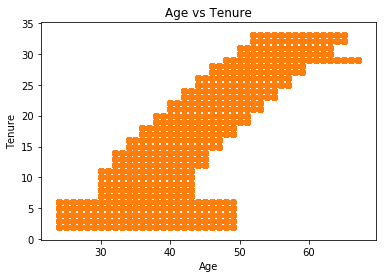

In [19]:
### Draw a scatter plot to identify the relation between employees age and tenure
plt.scatter(active_employees_DF.age, active_employees_DF.tenure)
X = active_employees_DF.age
Y = active_employees_DF.tenure
plt.xlabel("Age")
plt.ylabel("Tenure")
plt.title("Age vs Tenure")
plt.scatter(X,Y)
plt.show()

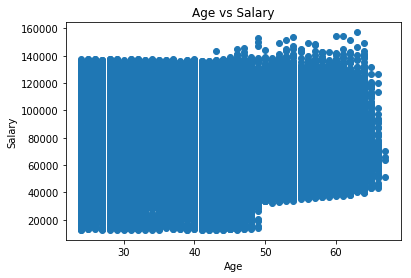

In [20]:
### Draw a scatter plot to identify the relation between employees age and salary
X = active_employees_DF.age
Y = active_employees_DF.salary
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs Salary")
plt.scatter(X,Y)
plt.show()

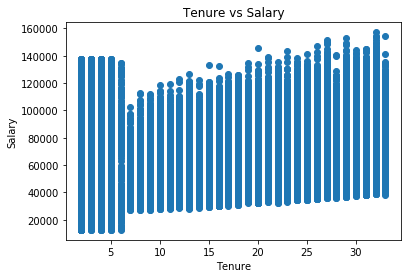

In [21]:
### Draw a scatter plot to identify the relation between employees tenure and salary
X = active_employees_DF.tenure
Y = active_employees_DF.salary
plt.xlabel("Tenure")
plt.ylabel("Salary")
plt.title("Tenure vs Salary")
plt.scatter(X,Y)
plt.show()

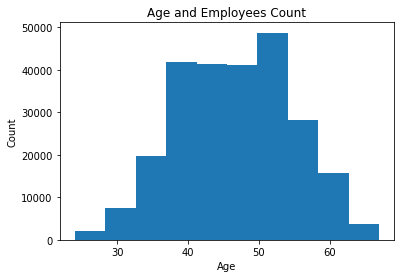

In [22]:
### Draw histogram for the employees count in each age group
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age and Employees Count")
plt.hist(active_employees_DF.age)
plt.show()

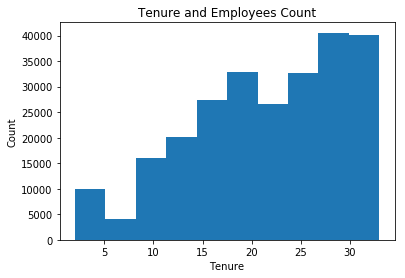

In [23]:
### Draw histogram for the employees count by tenure
plt.xlabel("Tenure")
plt.ylabel("Count")
plt.title("Tenure and Employees Count")
plt.hist(active_employees_DF.tenure)
plt.show()

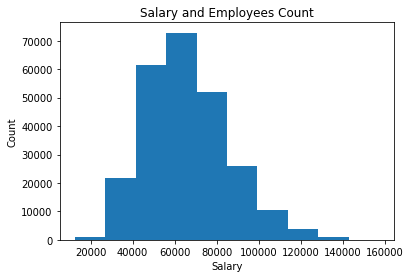

In [24]:
### Draw histogram for the employees count by salary
plt.xlabel("Salary")
plt.ylabel("Count")
plt.title("Salary and Employees Count")
plt.hist(active_employees_DF.salary)
plt.show()

In [25]:
### Extract Male and Female employees counts in each department
Y1 = dept_aggr_gender_DF['tot_emp'][dept_aggr_gender_DF['gender'] == 'M']
Y2 = dept_aggr_gender_DF['tot_emp'][dept_aggr_gender_DF['gender'] == 'F']

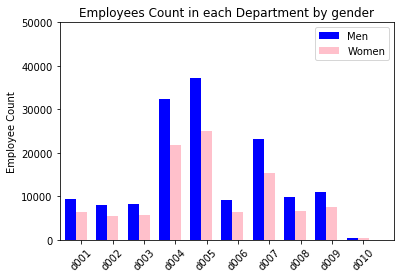

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)

## the data
N = 10

## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.35                      # the width of the bars

## the bars
rects1 = ax.bar(ind, Y1, width, color='blue')

rects2 = ax.bar(ind+width, Y2, width, color='pink')

# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0, 50000)
ax.set_ylabel('Employee Count')
ax.set_title('Employees Count in each Department by gender')
xTickMarks = ['d001', 'd002', 'd003', 'd004', 'd005', 'd006', 'd007', 'd008', 'd009', 'd010']
#xTickMarks = ['dep'+str(i) for i in range(1,11)]
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)

## add a legend
ax.legend( (rects1[0], rects2[0]), ('Men', 'Women') )

plt.show()

In [28]:
# Randomly sample 5% of your dataframe
# sample_5percent = active_employees_DF.sample(frac=0.05)

# Randomly sample 1000 rows from your dataframe
sample_5percent = active_employees_DF.sample(n=200)
sample_5percent
#For either approach above, you can get the rest of the rows by doing:

#sample_rest = active_employees_DF.loc[~Factive_employees_DF.index.isin(sample_5percent.index)]

,emp_no,first_name,last_name,gender,birth_date,hire_date,dept_no,dept_name,dept_from_date,salary,...,manager_gender,manager_birth_date,manager_hire_date,manager_from_date,age,tenure,manager_age,manager_tenure,salary_since,role_since
122802,153523,Bojan,Valette,F,1972-06-15,1996-08-04,d003,Human Resources,2004-02-15,42279,...,F,1960-12-02,1986-08-04,1993-03-21,46.0,22.0,58.0,32.0,10.0,15.0
26688,33318,Arumugam,Schaad,F,1962-06-15,1987-12-12,d007,Sales,1990-05-13,92567,...,M,1961-03-16,1989-12-30,1994-03-07,56.0,31.0,57.0,29.0,15.0,23.0
38624,48239,Serap,Matzke,F,1957-07-27,1988-05-08,d007,Sales,1993-10-08,88164,...,M,1961-03-16,1989-12-30,1994-03-07,61.0,30.0,57.0,29.0,15.0,20.0
130105,162676,Jeanna,Segond,M,1969-07-30,1996-12-03,d007,Sales,2001-08-12,89843,...,M,1961-03-16,1989-12-30,1994-03-07,49.0,22.0,57.0,29.0,10.0,17.0
171105,213929,Lorien,Luca,M,1982-11-10,2001-01-16,d009,Customer Service,2005-07-14,52801,...,M,1974-03-25,1996-07-10,2003-01-03,36.0,18.0,44.0,22.0,7.0,13.0
159951,200036,Jianhao,Zongker,M,1977-08-08,2000-05-30,d004,Production,2002-11-19,55711,...,M,1981-07-27,2001-02-05,2005-08-30,41.0,18.0,37.0,18.0,8.0,11.0
98559,123413,Tru,Uehara,F,1967-04-02,1993-07-30,d004,Production,1993-07-30,58915,...,M,1981-07-27,2001-02-05,2005-08-30,51.0,25.0,37.0,18.0,11.0,19.0
150882,188767,Mingsen,Baba,M,1969-03-09,1998-12-07,d002,Finance,1998-12-07,58988,...,F,1959-03-28,1986-01-14,1990-12-17,49.0,20.0,59.0,33.0,9.0,20.0
19386,24197,Alejandro,Schneeberger,F,1963-06-11,1986-09-14,d005,Development,1991-10-28,89762,...,F,1970-04-25,1989-10-21,1995-04-25,55.0,32.0,48.0,29.0,16.0,25.0
98976,123934,Seongbin,Bazzichi,F,1963-05-20,1993-08-05,d008,Research,2002-05-22,68443,...,F,1962-06-27,1993-01-31,1996-04-08,55.0,25.0,56.0,26.0,11.0,15.0


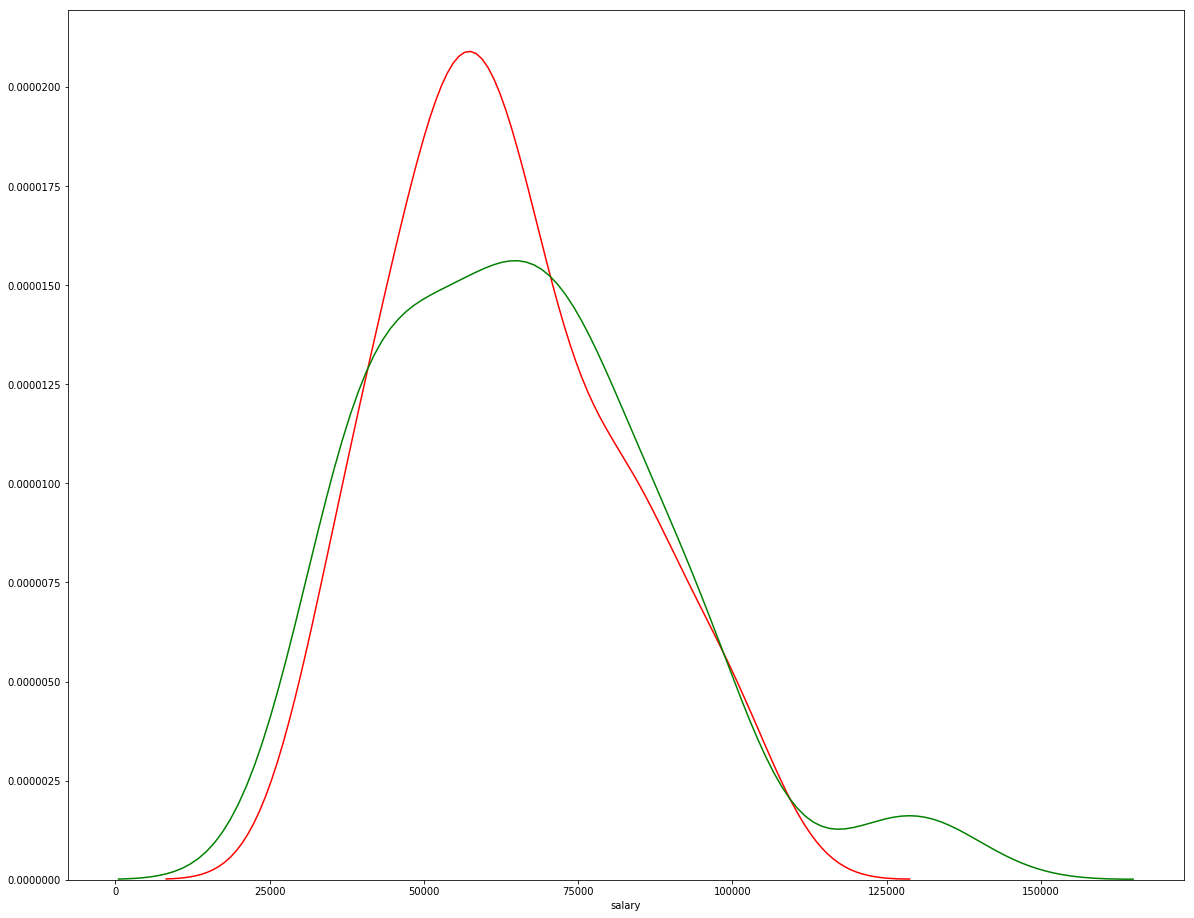

In [29]:
import seaborn as sn
plt.figure(figsize=(20, 16))

#sn.distplot( active_employees_DF[active_employees_DF.gender == 'M'].salary, hist = False, color = 'r' )
#sn.distplot( active_employees_DF[active_employees_DF.gender == 'F'].salary, hist = False, color = 'g' )

sn.distplot( sample_5percent[sample_5percent.gender == 'M'].salary, hist = False, color = 'r')
sn.distplot( sample_5percent[sample_5percent.gender == 'F'].salary, hist = False, color = 'g')